# Textacy documentation: https://chartbeat-labs.github.io/textacy/

## Working with Text

In [1]:
import textacy

In [2]:
text = (
    'Since the so-called "statistical revolution" in the late 1980s and mid 1990s, '
    'much Natural Language Processing research has relied heavily on machine learning. '
    'Formerly, many language-processing tasks typically involved the direct hand coding '
    'of rules, which is not in general robust to natural language variation. '
    'The machine-learning paradigm calls instead for using statistical inference '
    'to automatically learn such rules through the analysis of large corpora '
    'of typical real-world examples.')

In [3]:
textacy.text_utils.KWIC(text, 'language', window_width=35)

 1980s and mid 1990s, much Natural  Language  Processing research has relied hea
n machine learning. Formerly, many  language -processing tasks typically involve
s not in general robust to natural  language  variation. The machine-learning pa


In [4]:
textacy.preprocess_text(text, lowercase=True, no_punct=True)

'since the so called statistical revolution in the late 1980s and mid 1990s much natural language processing research has relied heavily on machine learning formerly many language processing tasks typically involved the direct hand coding of rules which is not in general robust to natural language variation the machine learning paradigm calls instead for using statistical inference to automatically learn such rules through the analysis of large corpora of typical real world examples'

In [5]:
metadata = {
    'title': 'Natural-language processing', 
    'url': 'https://en.wikipedia.org/wiki/Natural-language_processing',
    'source': 'wikipedia'
}

In [6]:
doc = textacy.Doc(text, metadata=metadata, lang='en')

In [7]:
doc

Doc(85 tokens; "Since the so-called "statistical revolution" in...")

In [8]:
doc.spacy_doc

Since the so-called "statistical revolution" in the late 1980s and mid 1990s, much Natural Language Processing research has relied heavily on machine learning. Formerly, many language-processing tasks typically involved the direct hand coding of rules, which is not in general robust to natural language variation. The machine-learning paradigm calls instead for using statistical inference to automatically learn such rules through the analysis of large corpora of typical real-world examples.

In [9]:
ngrams = list(textacy.extract.ngrams(doc, 3, filter_stops=True, filter_punct=True, filter_nums=False))
print(ngrams[0:10])

[1980s and mid, Natural Language Processing, Language Processing research, research has relied, heavily on machine, processing tasks typically, tasks typically involved, involved the direct, direct hand coding, coding of rules]


In [10]:
import textacy.keyterms
textacy.keyterms.textrank(doc, normalize='lemma', n_keyterms=10)

[('language', 0.06469840439566026),
 ('rule', 0.05652651341294322),
 ('machine', 0.05257062044951949),
 ('statistical', 0.04292595119686373),
 ('natural', 0.04177948765003742),
 ('world', 0.03970175136498526),
 ('real', 0.037150947215394275),
 ('typical', 0.03554707044022466),
 ('corpora', 0.034313898275359044),
 ('large', 0.0330254168906275)]

In [11]:
textacy.keyterms.sgrank(doc, ngrams=(1, 2, 3, 4), normalize='lower', n_keyterms=0.1)

[('natural language processing research', 0.31188112358833325),
 ('natural language variation', 0.09554941648195946),
 ('direct hand coding', 0.09461396545586934),
 ('mid 1990s', 0.05831079282180467),
 ('machine learning', 0.0552325339992006),
 ('late 1980s', 0.04713120721580818),
 ('general robust', 0.040647628278589344),
 ('statistical revolution', 0.03898147636679938)]

In [12]:
ts = textacy.TextStats(doc)
ts.basic_counts

{'n_sents': 3,
 'n_words': 73,
 'n_chars': 414,
 'n_syllables': 134,
 'n_unique_words': 57,
 'n_long_words': 30,
 'n_monosyllable_words': 38,
 'n_polysyllable_words': 19}

In [13]:
bot = doc.to_bag_of_terms(
    ngrams=(1, 2, 3), named_entities=True, weighting='count',
    as_strings=True)

In [14]:
for k, v in bot.items():
    print(f"{k}: {v}")

late 1980: 1
mid 1990: 1
natural language processing: 1
since: 1
call: 2
statistical: 2
revolution: 1
late: 1
1980: 1
mid: 1
1990: 1
natural: 2
language: 3
processing: 1
research: 1
rely: 1
heavily: 1
machine: 2
learning: 1
formerly: 1
process: 1
task: 1
typically: 1
involve: 1
direct: 1
hand: 1
coding: 1
rule: 2
general: 1
robust: 1
variation: 1
the: 1
learn: 2
paradigm: 1
instead: 1
inference: 1
automatically: 1
analysis: 1
large: 1
corpora: 1
typical: 1
real: 1
world: 1
example: 1
statistical revolution: 1
natural language: 2
language processing: 1
processing research: 1
rely heavily: 1
machine learning: 1
process task: 1
task typically: 1
typically involve: 1
direct hand: 1
hand coding: 1
general robust: 1
language variation: 1
the machine: 1
learn paradigm: 1
paradigm call: 1
call instead: 1
statistical inference: 1
automatically learn: 1
large corpora: 1
typical real: 1
world example: 1
1980 and mid: 1
language processing research: 1
research have rely: 1
heavily on machine: 1
pr

## Working with Many Texts

In [15]:
from textacy.datasets.capitol_words import *
cw = CapitolWords()
cw.download()

100%|██████████| 11.9M/11.9M [00:01<00:00, 10.5MB/s]


In [16]:
cw.info

{'name': 'capitol_words',
 'description': 'Collection of ~11k speeches in the Congressional Record given by notable U.S. politicians between Jan 1996 and Jun 2016.',
 'site_url': 'http://sunlightlabs.github.io/Capitol-Words/',
 'data_dir': '/opt/conda/lib/python3.6/site-packages/textacy/data/capitol_words'}

In [17]:
records = textacy.io.read_json(
    f"{cw.info['data_dir']}/capitol-words-py3.json.gz",
    mode='rt', lines=True)

In [18]:
for record in records:
    doc = textacy.Doc(record['text'], metadata=record['title'])
    print(doc)
    break

Doc(159 tokens; "Mr. Speaker, 480,000 Federal employees are work...")


In [19]:
records = cw.records(speaker_name={'Hillary Clinton', 'Barack Obama'})
text_stream, metadata_stream = textacy.io.split_records(records, 'text')

### Make a corpus

In [20]:
corpus = textacy.Corpus(textacy.load_spacy('en'),
                        texts=cw.texts(speaker_party='R', chamber='House', limit=100))

In [21]:
corpus

Corpus(100 docs; 31410 tokens)

In [22]:
corpus[10:15]

[Doc(124 tokens; "Mr. Speaker, I want to congratulate all of the ..."),
 Doc(304 tokens; "Mr. Speaker, I want to thank the gentleman, and..."),
 Doc(1076 tokens; "Mr. Speaker, it has been a great debate to list..."),
 Doc(3261 tokens; "Mr. Speaker, I think probably a good lead-in to..."),
 Doc(2826 tokens; "Mr. Speaker, I thank very much the gentleman fr...")]

In [23]:
corpus.n_docs, corpus.n_sents, corpus.n_tokens

(100, 1350, 31410)

#### Create a document-term matrix

In [24]:
vectorizer = textacy.Vectorizer(
    tf_type='linear', apply_idf=True, idf_type='smooth', norm='l2',
    min_df=2, max_df=0.95)

In [25]:
doc_term_matrix = vectorizer.fit_transform(
    (doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True) for doc in corpus))

In [26]:
print(repr(doc_term_matrix))

<100x1131 sparse matrix of type '<class 'numpy.float64'>'
	with 6319 stored elements in Compressed Sparse Row format>


#### Create a topic model

In [38]:
model = textacy.TopicModel('nmf', n_topics=3)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
doc_topic_matrix.shape

(100, 3)

In [39]:
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print('topic', topic_idx, ':', '   '.join(top_terms))

topic 0 : mr.   yield   minute   2 minute   2   distinguished   gentleman   chairman   madam   state
topic 1 :    people   go   want   money   washington   think   program   $   spend
topic 2 : budget   fiscal   resolution   section   concurrent   year   level   1997   fiscal year 1997   house


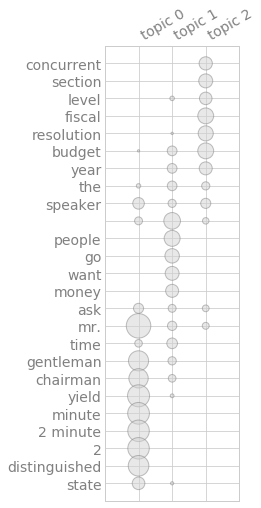

In [40]:
model.termite_plot(doc_term_matrix, vectorizer.id_to_term)